In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
from Model import ReferenceDependenceClass

In [4]:
model = ReferenceDependenceClass()

In [5]:
print(model.par.ref_income_u)


print(model.par.r_u[35])

[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7
 0.7 0.7 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
0.4


In [6]:
print(model.par.r_e)

[[1.   1.   1.   ... 1.   1.   1.  ]
 [1.   0.97 0.97 ... 1.   1.   1.  ]
 [1.   0.97 0.94 ... 1.   1.   1.  ]
 ...
 [1.   0.97 0.94 ... 1.   1.   1.  ]
 [1.   0.97 0.94 ... 0.94 1.   1.  ]
 [1.   0.97 0.94 ... 0.88 0.94 1.  ]]


In [7]:
from hand_to_mouth import *

In [8]:
unemployed_ss(model.par)

1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.

(0.3440326235512017, -1.6224936773597316)

In [9]:
solve_search_effort(model.par)


1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.

(array([0.23831647, 0.23207541, 0.22646972, 0.22206121, 0.21973139,
        0.22087478, 0.22775741, 0.24426566, 0.27773154, 0.3444988 ,
        0.33846568, 0.33237321, 0.32637897, 0.3207718 , 0.31606799,
        0.31318061, 0.3137319 , 0.32067857, 0.33974101, 0.38341476,
        0.37922301, 0.37493269, 0.37055651, 0.36611862, 0.36166179,
        0.35725884, 0.35303074, 0.34917478, 0.34600796, 0.34403256,
        0.34403256, 0.34403256, 0.34403256, 0.34403256, 0.34403256,
        0.34403256, 0.34403256, 0.34403256, 0.34403256, 0.34403256,
        0.34403262]),
 array([-3.06046115, -2.84301253, -2.62900138, -2.42396254, -2.23639371,
        -2.0793063 , -1.97280959, -1.94881726, -2.06070709, -2.40653748,
        -3.19916408, -3.00733439, -2.81447194, -2.6233468 , -2.43869026,
        -2.26851899, -2.12642396, -2.03571913, -2.03761036, -2.20957607,
        -2.71627733, -2.59093745, -2.46454705, -2.33771729, -2.2113806 ,
        -2.08695279, -1.96658174, -1.85353022, -1.75276662, -1.671878

1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.58 0.64 0.7  0.76 0.82 0.88 0.94]
1
2
3
4
5
6
7
8
9
10
40
2.677913267054918
[0.4  0.46 0.52 0.

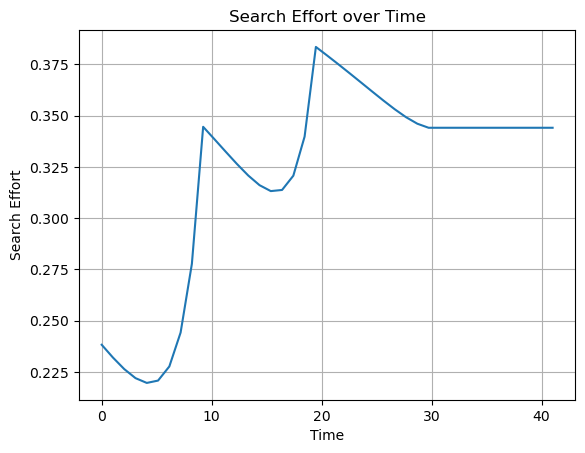

In [10]:
import matplotlib.pyplot as plt

# Assuming solve_search_effort returns a tuple where the first element is the time array and the second element is the search effort array
search_effort,value_function = solve_search_effort(model.par)
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, search_effort)
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()
